# Solving Gravitational Orbits
### 5300 Final Problem 2 | Aiden Zelakiewicz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
class Orbit:
    """Class that represents an orbit in 2D space using Lagrangian mechanics.

    Parameters
    ----------
    G : float
        Gravitational constant.
    m1 : float
        Mass of the first object.
    m2 : float
        Mass of the second object.
    """

    def __init__(self, G = 1., m1 = 1., m2 = 1.):
        # Initialize the parameters as class attributes
        self.G = G
        self.m1 = m1
        self.m2 = m2

    def dz_dt(self, t, z):
        """
        Parameters
        ----------
        t : float
            Time
        z : float
            8-component vector with
                z[0] = x1(t), z[1] = x1_dot(t),
                z[2] = y1(t), z[3] = y1_dot(t),
                z[4] = x2(t), z[5] = x2_dot(t),
                z[6] = y2(t), z[7] = y2_dot(t)
        """
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = z

        # Distance between the two orbiting objects
        R = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

        # Getting the second derivatives
        x1_dot_dot = self.G * self.m2 * (x2 - x1) / R**3
        y1_dot_dot = self.G * self.m2 * (y2 - y1) / R**3
        x2_dot_dot = self.G * self.m1 * (x1 - x2) / R**3
        y2_dot_dot = self.G * self.m1 * (y1 - y2) / R**3

        return [x1_dot, x1_dot_dot, \
                y1_dot, y1_dot_dot, \
                x2_dot, x2_dot_dot, \
                y2_dot, y2_dot_dot]

    def solve_ode(self, t_pts, z_0, abserr=1.0e-10, relerr=1.0e-10):
        """Solve the ODE given initial conditions.

        Parameters
        ----------
        t_pts : float
            Times at which to solve the ODE.
        z_0 : float
            Initial conditions.
        abserr : float
            Absolute error tolerance.
        relerr : float
            Relative error tolerance.
        """
        
        # Default method is 'RK45'
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), z_0, t_eval=t_pts, atol=abserr, rtol=relerr)

        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y

        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot

### Importing some functions from older notebooks

In [3]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                            color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

### Preparing the plots and plotting

In [5]:
# Getting times
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

# Labels for the orbits
orbit_labels = (r'$x$', r'$y$')

In [6]:
# Setting up the orbit class
m1 = 1.
m2 = 5.
G = 1.
o1 = Orbit(G=G, m1=m1, m2=m2)

# Getting initial conditions that set the center of mass velocity to zero
x1_0 = 1.
x1_dot_0 = -1
y1_0 = 1.
y1_dot_0 = 1.
x2_0 = -(m1/m2) * x1_0
x2_dot_0 = -(m1/m2) * x1_dot_0
y2_0 = -(m1/m2) * y1_0
y2_dot_0 = -(m1/m2) * y1_dot_0


# Solving the differential equation
z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)


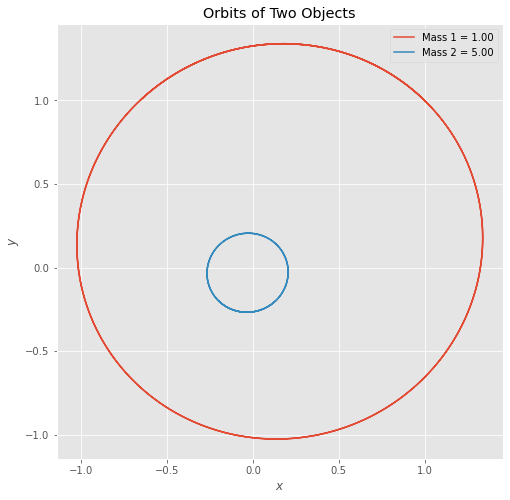

In [7]:
# Plotting the orbits
fig = plt.figure(figsize=(8,8))
plt.style.use('ggplot')
ax = fig.add_subplot(1,1,1)

# Plotting the orbits
ax.plot(x1, y1, label='Mass 1 = {:.2f}'.format(m1))
ax.plot(x2, y2, label='Mass 2 = {:.2f}'.format(m2))

ax.set_xlabel(orbit_labels[0])
ax.set_ylabel(orbit_labels[1])

ax.set_title('Orbits of Two Objects')
plt.legend()
plt.show()

### Now do case where $m_1 >> m_2$

In [8]:
# Setting up the orbit class
m1 = 1.
m2 = 40.
G = 1.
o1 = Orbit(G=G, m1=m1, m2=m2)

# Getting initial conditions that set the center of mass velocity to zero
x1_0 = 1.
x1_dot_0 = -1.
y1_0 = 1.
y1_dot_0 = 1.
x2_0 = -(m1/m2) * x1_0
x2_dot_0 = -(m1/m2) * x1_dot_0
y2_0 = -(m1/m2) * y1_0
y2_dot_0 = -(m1/m2) * y1_dot_0


# Solving the differential equation
z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)


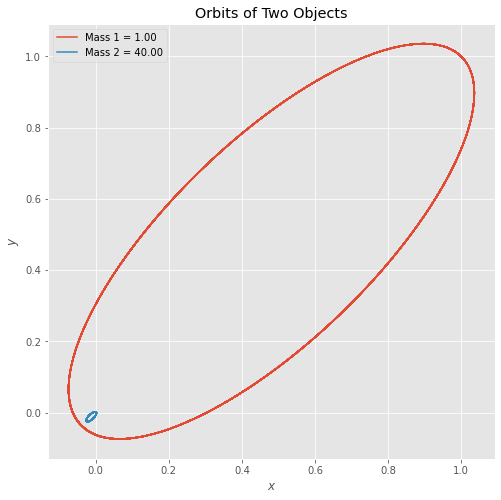

In [9]:
# Plotting the orbits
fig = plt.figure(figsize=(8,8))
plt.style.use('ggplot')
ax = fig.add_subplot(1,1,1)

# Plotting the orbits
ax.plot(x1, y1, label='Mass 1 = {:.2f}'.format(m1))
ax.plot(x2, y2, label='Mass 2 = {:.2f}'.format(m2))

ax.set_xlabel(orbit_labels[0])
ax.set_ylabel(orbit_labels[1])

ax.set_title('Orbits of Two Objects')
plt.legend()
plt.show()

#### The above orbit looks like that of an eccentric exoplanet (the first thing that came to mind)! This is how many stellar systems interact, so it is exactly as expected. The speed of the lower mass object will be much greater at periapse than at apoapse. The heavier mass will essentially be at rest in the center of mass.